In [2]:
import geopandas as gpd
import rtree
import pygeos
import mapclassify
import geobr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#from Models.class_previsao import DataSciencePrevisao
from Models.class_mapas import Mapas
from Models.DataScienceAnalises import DataScienceAnalises

/usr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [3]:


df = geobr.read_municipality(code_muni="all", year=2020)
print(df.columns)
display(df.head())

porto_alegre_df = df[df.name_muni == "Porto Alegre"]
display(porto_alegre_df)

# lendo escolas
df_base = geobr.read_schools(year=2020)
df_base.head()

Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry'],
      dtype='object')


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.00080 -11.29737, -61.00103..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426..."


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
4931,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-51.16347 -30.26269, -51.16237..."


,abbrev_state,name_muni,code_school,name_school,education_level,education_level_others,admin_category,address,phone_number,government_level,private_school_type,private_government_partnership,regulated_education_council,service_restriction,size,urban,location_type,date_update,geometry
0,RO,Porto Velho,11000023,EEEE ABNAEL MACHADO DE LIMA - CENE,Ensino Fundamental,Atendimento Educacional Especializado,Pública,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,Entre 51 e 200 matrículas de escolarização,Urbana,A escola não está em área de localização difer...,2020-10-18,POINT (-63.85401 -8.75846)
1,RO,Porto Velho,11000040,EMEIEF PEQUENOS TALENTOS,Educação Infantil,,Pública,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32135237,Municipal,Não Informado,Não,Sim,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Entre 201 e 500 matrículas de escolarização,Urbana,A escola não está em área de localização difer...,2020-10-18,POINT (-63.88392 -8.79373)
2,RO,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,"Educação Infantil, Ensino Fundamental, Ensino ...",,Privada,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,Privada,Particular,Não,Sim,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Mais de 1000 matrículas de escolarização,Urbana,A escola não está em área de localização difer...,2020-10-18,POINT (-63.90199 -8.76073)
3,RO,Porto Velho,11000082,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,"Educação Infantil, Ensino Fundamental",,Privada,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,Privada,Particular,Não,Sim,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Entre 51 e 200 matrículas de escolarização,Urbana,A escola não está em área de localização difer...,2020-10-18,POINT (-63.89618 -8.76520)
4,RO,Porto Velho,11000104,CENTRO EDUC CORA CORALINA,"Educação Infantil, Ensino Fundamental",,Privada,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,Privada,Particular,Não,Sim,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Entre 501 e 1000 matrículas de escolarização,Urbana,A escola não está em área de localização difer...,2020-10-18,POINT (-63.87547 -8.76863)


## Exemplo de uso model

Tamanho: (5570, 8)
Colunas: Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_muni     5570 non-null   float64 
 1   name_muni     5570 non-null   object  
 2   code_state    5570 non-null   float64 
 3   abbrev_state  5570 non-null   object  
 4   name_state    5570 non-null   object  
 5   code_region   5570 non-null   float64 
 6   name_region   5570 non-null   object  
 7   geometry      5570 non-null   geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 348.3+ KB
Info: None
Valores ausentes?: code_muni       0
name_muni       0
code_state      0
abbrev_state    0
name_state      0
code_region     0
name_region     0
geometry        0
dtype: int64
Erro na análise

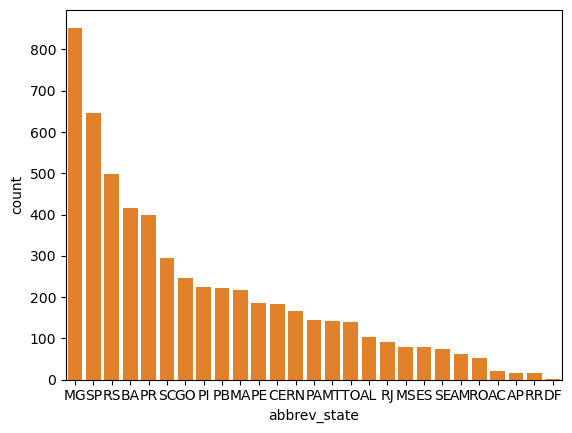

Mapas interativos
Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry'],
      dtype='object')


CRSError: Invalid projection: espg:4674: (Internal Proj Error: proj_create: crs not found)

In [5]:
dsa_analise = DataScienceAnalises()    
#predict = DataSciencePrevisao()
mapas = Mapas()


dsa_analise.analise_inicial(df)
dsa_analise.plot_barras(df, "abbrev_state")

mapas.mapas_interativos(df,"Rio De Janeiro" )